<a href="https://colab.research.google.com/github/BernadusRaka/API-Test-Using-CI-CD/blob/master/Extra_Tree_Regressor_using_cross_val_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/dataBoiler6PertaminaBalikpapan.csv', delimiter = ';')
df.head()

,Deaerator6Level,BfwFlowToSuperheater,SteamDesuperheaterCont,BoilerFeedWater,MainGasInletToFurnace,FuelGasBehindCv,CombustionAirFlow,AirBurnerBox,MainSteamTemperature,FlueGasFurnace,Boiler6FlueGasOutlet,SteamBoiler,WindBoxPressure,CombustionAir,Boiler6SteamDrum,MainSteamHeader,EconomizerWaterInlet,EconomizerWaterOutlet,O2Content
0,73.833286,2878.261279,385.089943,73480.63145,4990.783449,0.205181,90227.57088,191.485891,465.016393,126.163092,380.296525,60.603667,164.637920,41.696390,35.146416,74531.61886,127.565901,204.433856,2.819320
1,74.034338,2915.729642,384.941264,73335.77750,4993.540673,0.205146,90541.08777,194.214289,465.010750,125.341981,380.502482,60.543705,164.494828,39.827070,35.071969,74209.44911,125.919225,203.944070,2.890382
2,74.265272,2923.531387,384.879958,73254.20730,4995.837888,0.205098,90766.57889,191.068990,465.012763,127.680386,380.569313,60.517073,164.050287,40.087145,35.035882,74216.97196,125.275447,203.372497,2.896828
3,73.791472,2929.040084,385.137359,73544.81138,4993.856938,0.205290,90967.69117,193.446918,464.997549,122.609493,381.001274,60.554271,164.333143,39.799208,35.048462,74403.69135,127.290542,204.706366,2.944402
4,73.816527,2898.786333,385.228053,73397.35887,4997.007632,0.205069,91530.15929,191.624351,464.990651,121.592184,380.955237,60.477275,164.523739,39.351849,34.971700,74470.67353,127.715948,205.071043,2.942352


In [ ]:
df.corr()

,Deaerator6Level,BfwFlowToSuperheater,SteamDesuperheaterCont,BoilerFeedWater,MainGasInletToFurnace,FuelGasBehindCv,CombustionAirFlow,AirBurnerBox,MainSteamTemperature,FlueGasFurnace,Boiler6FlueGasOutlet,SteamBoiler,WindBoxPressure,CombustionAir,Boiler6SteamDrum,MainSteamHeader,EconomizerWaterInlet,EconomizerWaterOutlet,O2Content
Deaerator6Level,1.000000,-0.023763,-0.021715,0.013485,0.001267,-0.003238,-0.099631,-0.089353,-0.054913,-0.078679,-0.026100,-0.015610,-0.094683,0.042914,-0.003416,0.007173,0.056957,-0.052216,-0.048152
BfwFlowToSuperheater,-0.023763,1.000000,-0.201240,0.751543,0.772640,0.738732,0.258044,0.202674,0.346450,0.357843,0.755523,0.605306,0.273502,0.042334,-0.145622,0.812377,0.059321,-0.537857,-0.641750
SteamDesuperheaterCont,-0.021715,-0.201240,1.000000,-0.169100,-0.175390,-0.164987,-0.130542,-0.194268,0.790421,-0.121655,-0.140854,-0.046200,-0.189242,0.115890,0.136605,-0.144978,-0.058788,0.025599,0.123003
BoilerFeedWater,0.013485,0.751543,-0.169100,1.000000,0.992609,0.984502,0.108278,0.233189,0.289960,0.294146,0.917051,0.786724,0.269395,0.028196,-0.220645,0.990426,0.002088,-0.753899,-0.923620
MainGasInletToFurnace,0.001267,0.772640,-0.175390,0.992609,1.000000,0.993506,0.184830,0.300245,0.311197,0.321216,0.942690,0.766047,0.331574,0.023733,-0.209942,0.984568,-0.013658,-0.709355,-0.887778
FuelGasBehindCv,-0.003238,0.738732,-0.164987,0.984502,0.993506,1.000000,0.205504,0.333964,0.305160,0.338815,0.946770,0.732713,0.362294,-0.007879,-0.200383,0.970412,-0.041800,-0.686602,-0.871490
CombustionAirFlow,-0.099631,0.258044,-0.130542,0.108278,0.184830,0.205504,1.000000,0.928593,0.223501,0.728757,0.460622,0.021894,0.940508,-0.379368,-0.004844,0.093237,0.128918,0.511132,0.262712
AirBurnerBox,-0.089353,0.202674,-0.194268,0.233189,0.300245,0.333964,0.928593,1.000000,0.133152,0.719114,0.547657,0.083236,0.970872,-0.307756,-0.032970,0.182846,0.084796,0.407892,0.126803
MainSteamTemperature,-0.054913,0.346450,0.790421,0.289960,0.311197,0.305160,0.223501,0.133152,1.000000,0.255069,0.400248,0.333693,0.181578,0.002671,0.080285,0.337004,-0.064867,-0.187565,-0.202165
FlueGasFurnace,-0.078679,0.357843,-0.121655,0.294146,0.321216,0.338815,0.728757,0.719114,0.255069,1.000000,0.526363,0.213127,0.825031,-0.582770,-0.071547,0.288780,0.060856,0.180062,-0.037020


In [ ]:
df.columns
droplist=['Deaerator6Level ', 'BfwFlowToSuperheater', 'SteamDesuperheaterCont',
          'MainGasInletToFurnace', 'CombustionAirFlow', 'AirBurnerBox', 'MainSteamTemperature',
       'FlueGasFurnace', 'Boiler6FlueGasOutlet', 'SteamBoiler',
       'WindBoxPressure', 'CombustionAir ', 'Boiler6SteamDrum',
       'EconomizerWaterInlet ']

df = df.drop(droplist,axis=1)
df.head()

,BoilerFeedWater,FuelGasBehindCv,MainSteamHeader,EconomizerWaterOutlet,O2Content
0,73480.63145,0.205181,74531.61886,204.433856,2.819320
1,73335.77750,0.205146,74209.44911,203.944070,2.890382
2,73254.20730,0.205098,74216.97196,203.372497,2.896828
3,73544.81138,0.205290,74403.69135,204.706366,2.944402
4,73397.35887,0.205069,74470.67353,205.071043,2.942352


In [ ]:
X = df.drop('O2Content', axis=1)
y = df['O2Content']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
model = ExtraTreesRegressor()
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

scaler.fit(X_train)


StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv=5)
scores

array([-0.01035756, -0.00781873, -0.0088786 , -0.00849548, -0.008332  ])

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


mse = abs(scores.mean())

print("MSE scores:", mse)
print("RMSE scores:", np.sqrt(mse))


MSE scores: 0.0087764741829616
RMSE scores: 0.09368283825205981


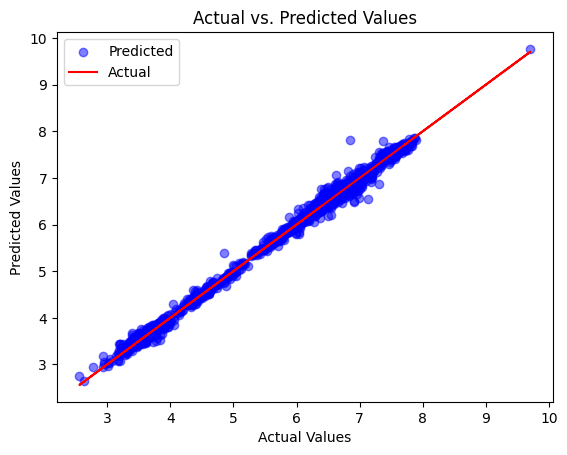

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted')

# Plotting a line for perfect predictions for reference
plt.plot(y_test, y_test, color='red', label='Actual')

# Adding labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()

# Show plot
plt.show()

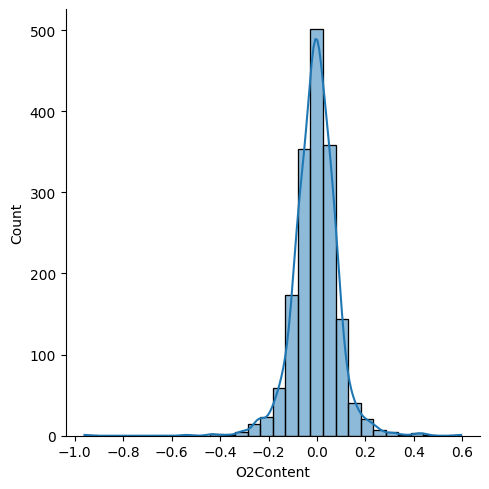

In [ ]:
test_residuals = y_test - y_pred
sns.displot(test_residuals, bins=30, kde=True)

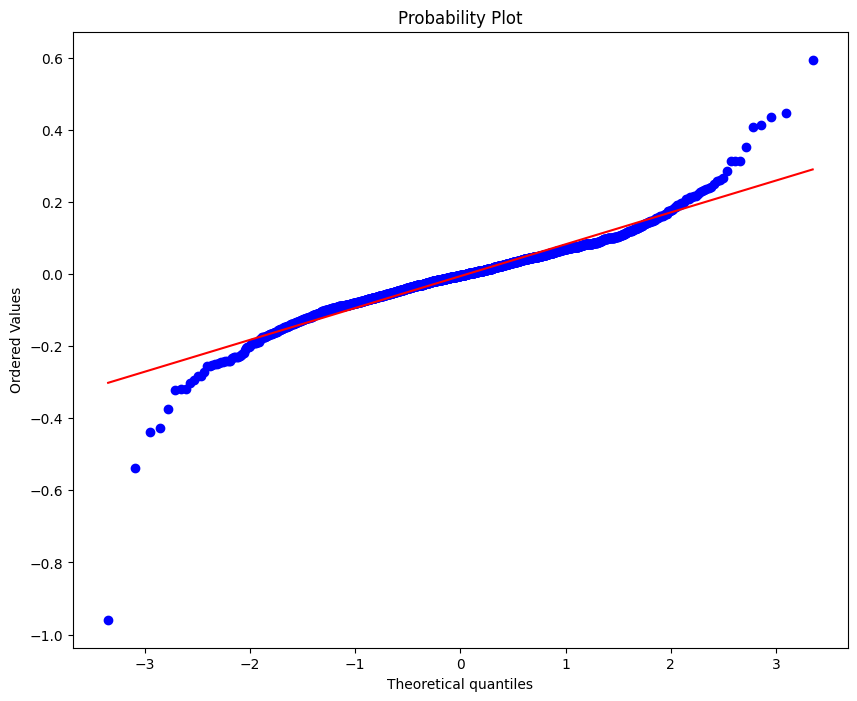

In [ ]:
import scipy as sp

fig, ax = plt.subplots(figsize=(10,8),dpi=100)
_=sp.stats.probplot(test_residuals,plot=ax)

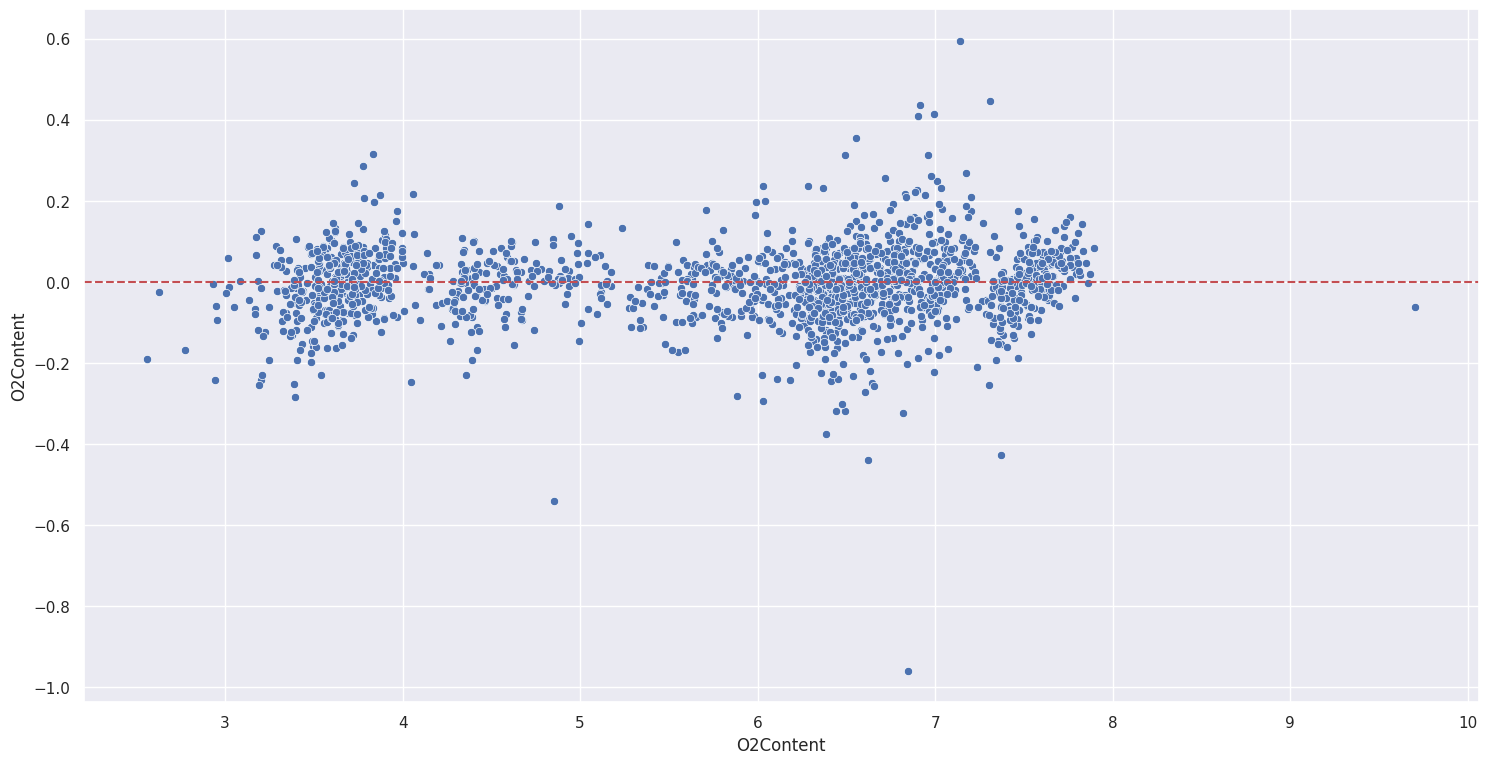

In [ ]:
import matplotlib.pyplot as plt

test_residuals = y_test - y_pred

sns.set(rc={"figure.figsize": (18, 9)})
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0, color ='r', ls='--')

# Hyperparameter Optimization

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_OTHER, y_train, y_OTHER = train_test_split(X,y,test_size=0.3,random_state=42)
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER,y_OTHER,test_size=0.5, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [22]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

base_model = ExtraTreesRegressor()
base_model.fit(X_train,y_train)

#Extra Tree Hyperparameter tuning
param_grid_etr={
    'n_estimators': [5,10,25,50,75,100],
    'max_depth': [2,8,16,32,50],
    'min_samples_split': [0.5,1,2,4,6],
    'min_samples_leaf': [1,2,3],
    'max_features': ['auto','sqrt','log2'],
    'bootstrap': [True, False]
    }

grid_model = GridSearchCV(base_model, param_grid_etr)
grid_model.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it i

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 8, 16, 32, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [0.5, 1, 2, 4, 6],
                         'n_estimators': [5, 10, 25, 50, 75, 100]})

In [40]:
tuned_param = grid_model.best_params_
tuned_param

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [41]:
from sklearn.metrics import mean_squared_error

y_eval_pred = grid_model.predict(X_eval)
mean_squared_error(y_eval, y_eval_pred)

0.007989747734221732

In [42]:
new_model = ExtraTreesRegressor(**tuned_param)
new_model.fit(X_train,y_train)

final_pred = new_model.predict(X_test)
mse = mean_squared_error(y_test,final_pred)

print("MSE scores:", mse)
print("RMSE scores:", np.sqrt(mse))

MSE scores: 0.008326103397483993
RMSE scores: 0.09124748433509822


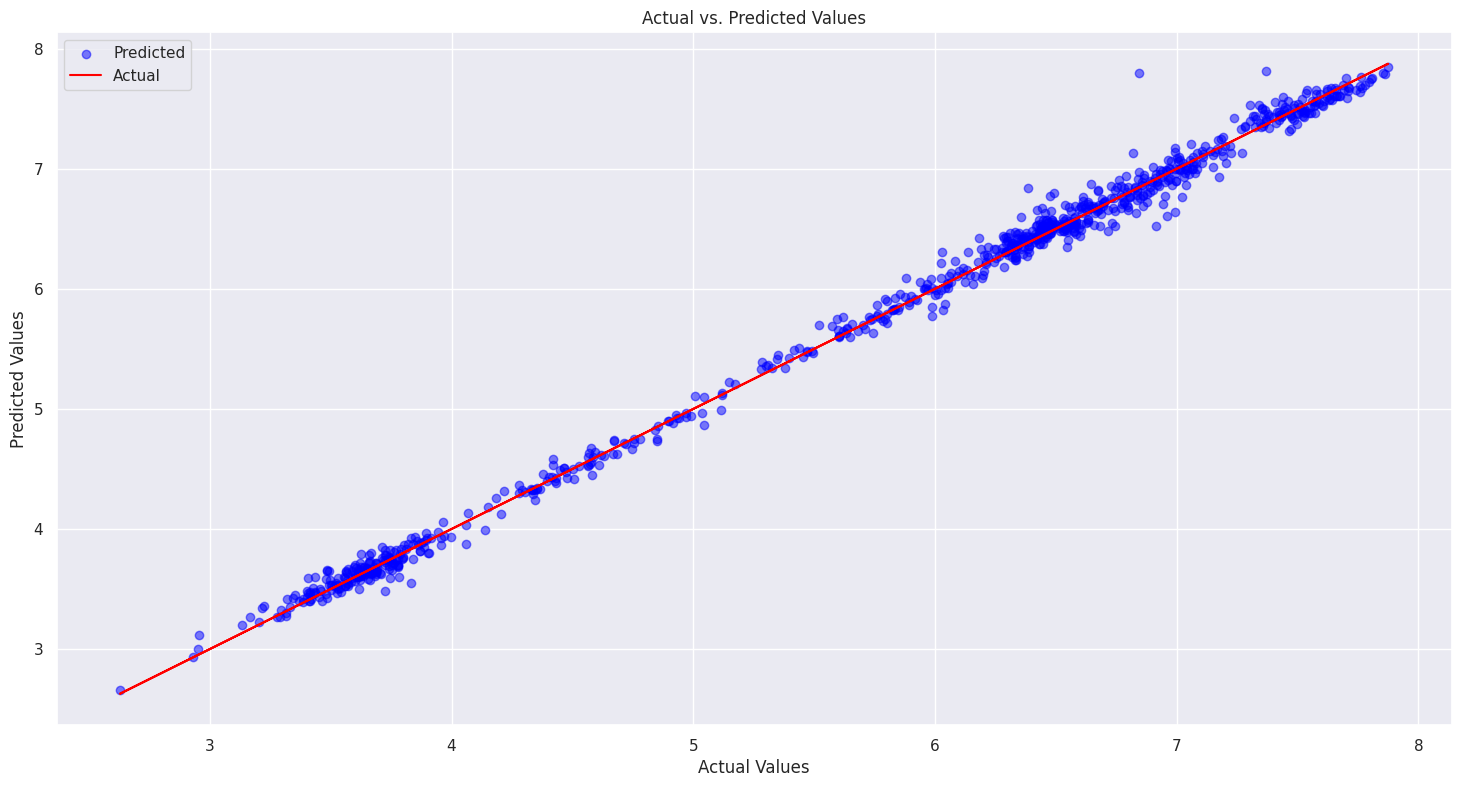

In [44]:
import matplotlib.pyplot as plt

# Plotting actual values
plt.scatter(y_test, final_pred, alpha=0.5, color='blue', label='Predicted')

# Plotting a line for perfect predictions for reference
plt.plot(y_test, y_test, color='red', label='Actual')

# Adding labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()

# Show plot
plt.show()


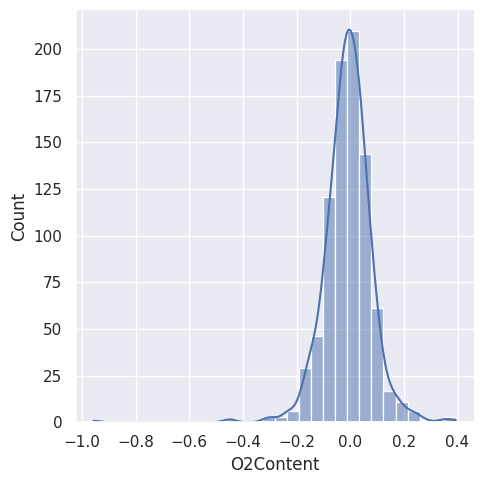

In [45]:
test_residuals = y_test - final_pred
sns.displot(test_residuals, bins=30, kde=True)

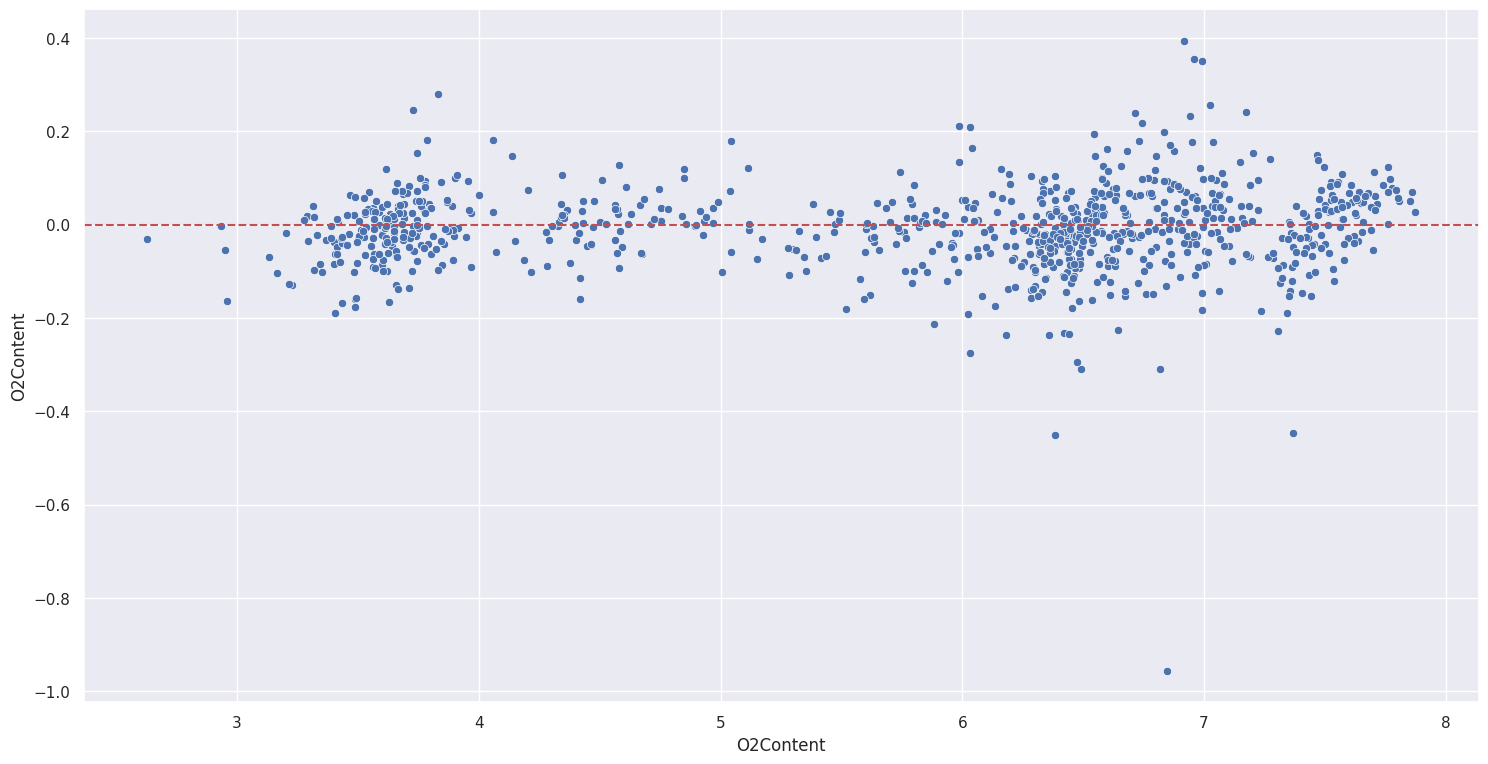

In [46]:
sns.set(rc={"figure.figsize": (18, 9)})
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0, color ='r', ls='--')

In [60]:
df.columns

Index(['BoilerFeedWater', 'FuelGasBehindCv', 'MainSteamHeader',
       'EconomizerWaterOutlet ', 'O2Content'],
      dtype='object')

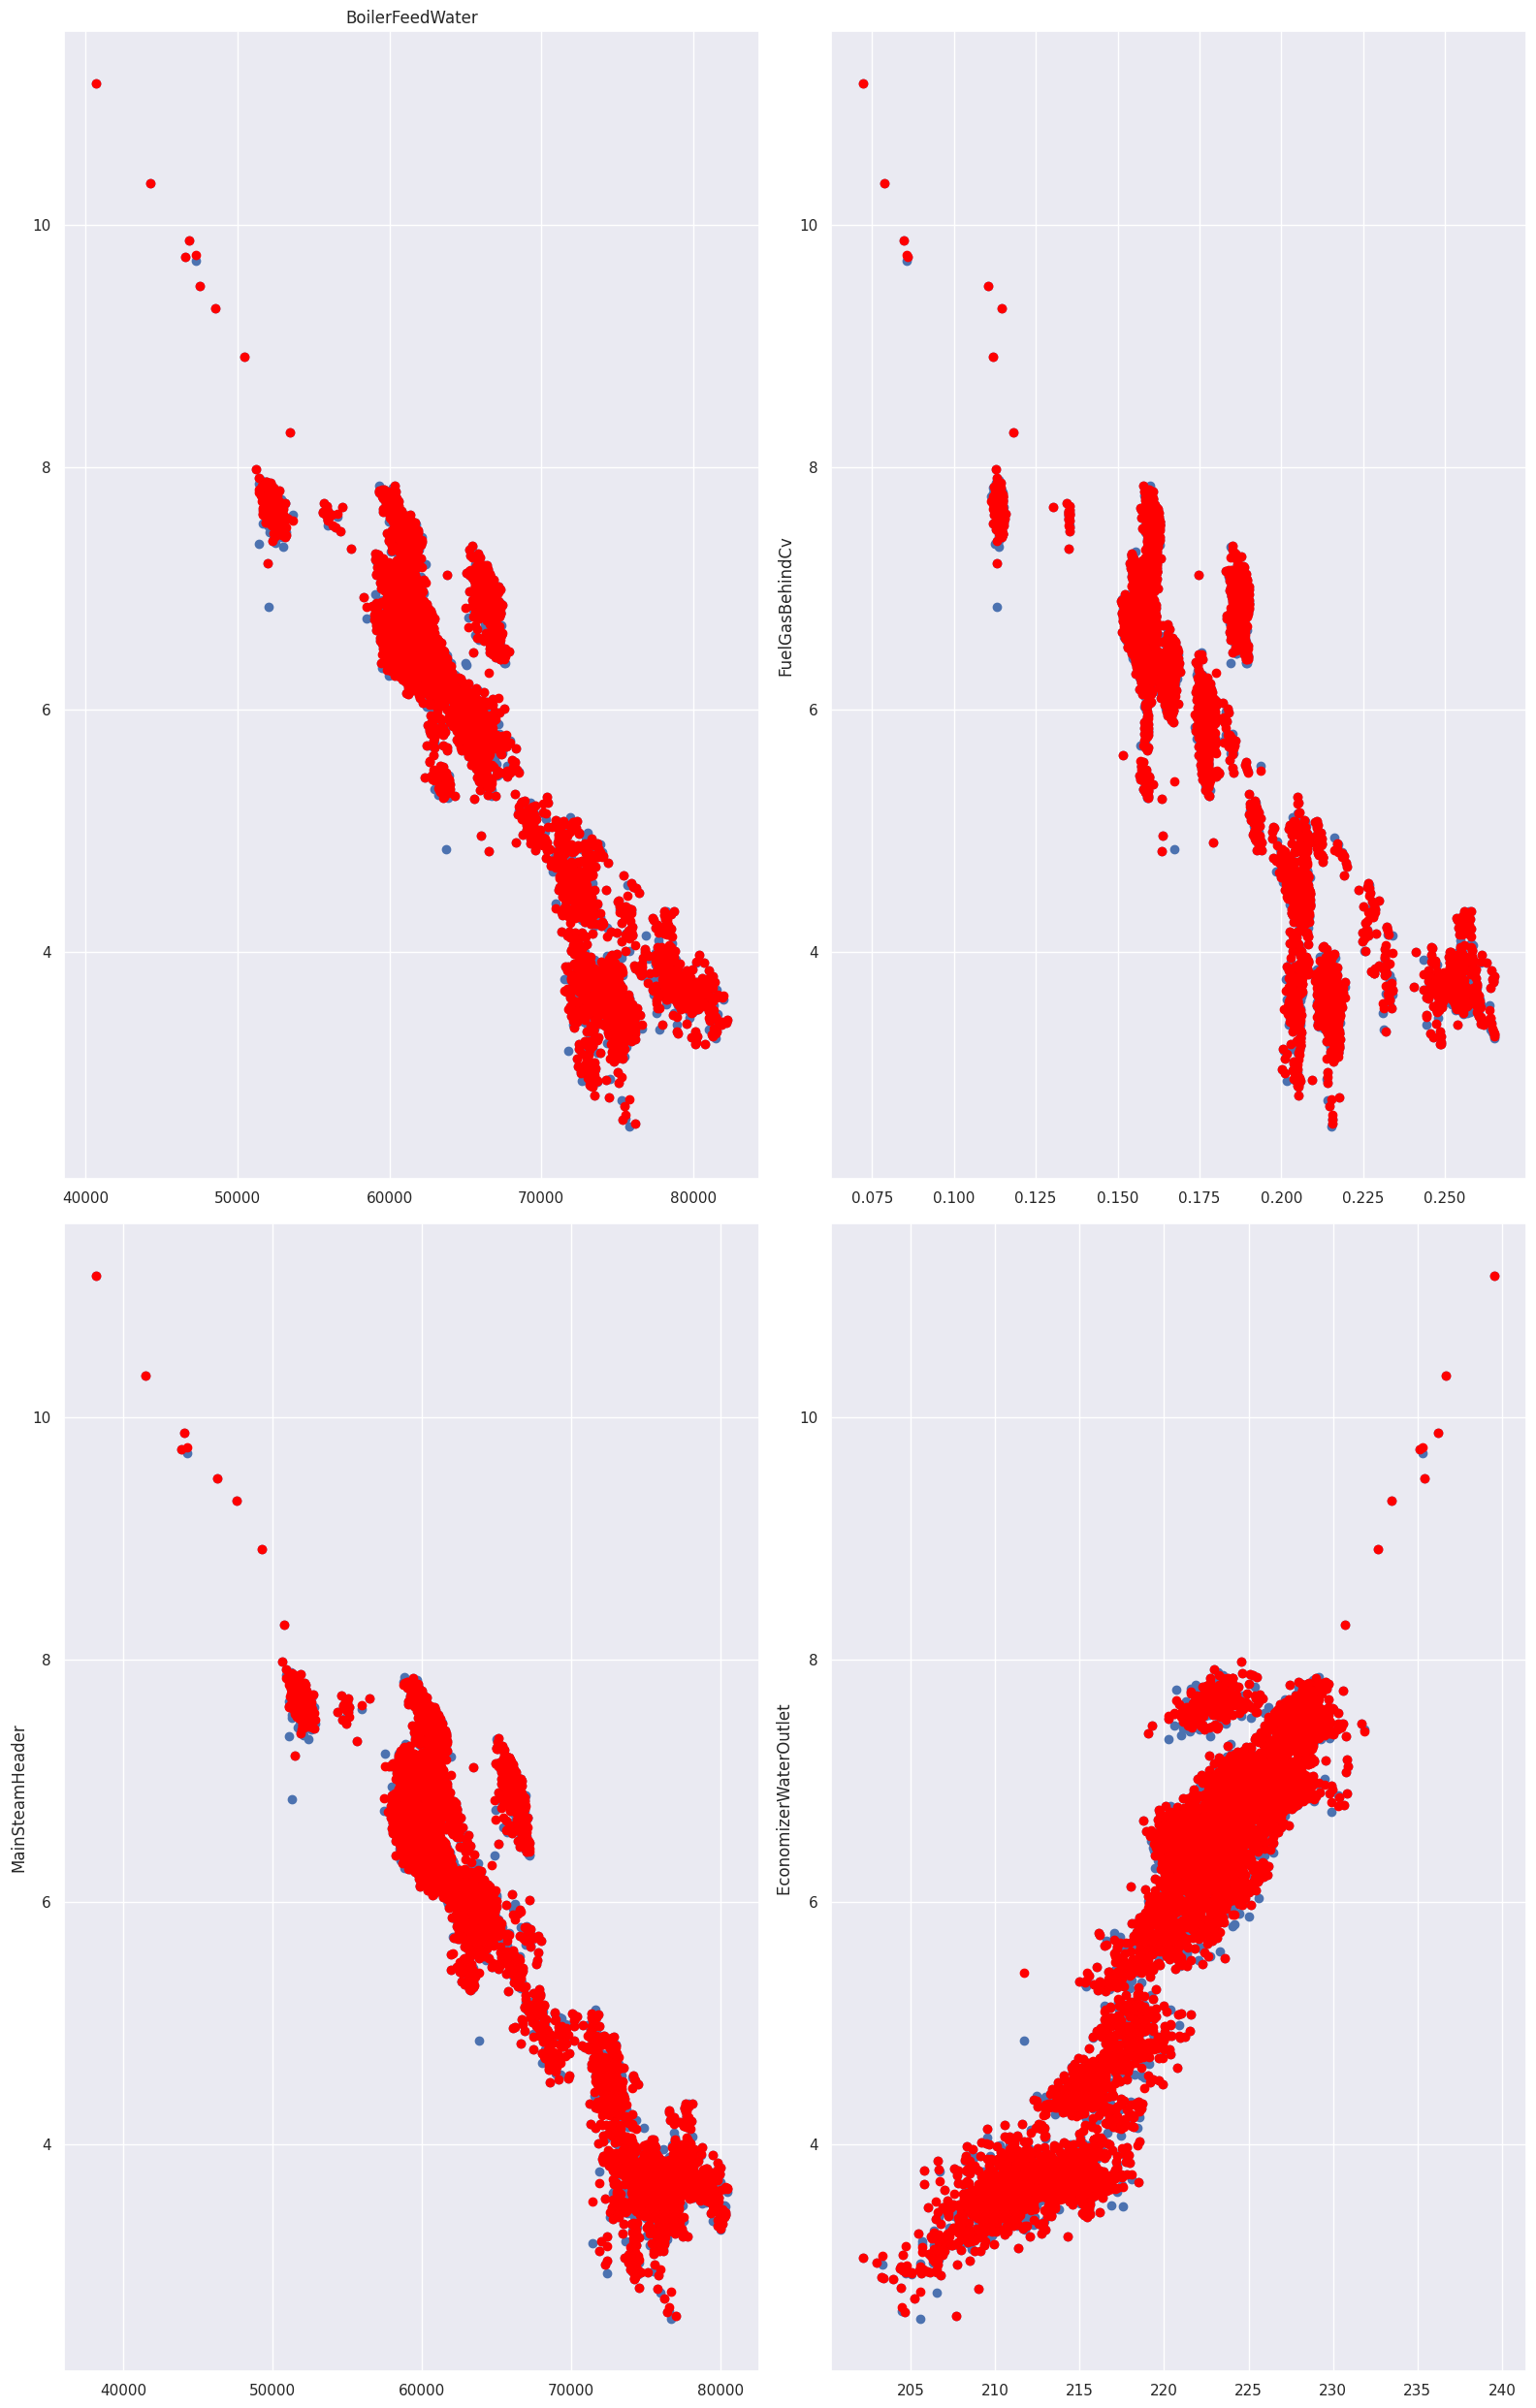

In [61]:
import matplotlib.pyplot as plt

# Assuming y_pred and df are defined and df contains the 'EconomizerWaterOutlet' column

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 25))

axes[0,0].plot(df['BoilerFeedWater'], df['O2Content'], 'o')
axes[0,0].plot(df['BoilerFeedWater'], y_pred, 'o', color='red')
axes[0,0].set_title("BoilerFeedWater")

axes[0,1].plot(df['FuelGasBehindCv'], df['O2Content'], 'o')
axes[0,1].plot(df['FuelGasBehindCv'], y_pred, 'o', color='red')
axes[0,1].set_ylabel("FuelGasBehindCv")

axes[1,0].plot(df['MainSteamHeader'], df['O2Content'], 'o')
axes[1,0].plot(df['MainSteamHeader'], y_pred, 'o', color='red')
axes[1,0].set_ylabel("MainSteamHeader")

axes[1,1].plot(df['EconomizerWaterOutlet '], df['O2Content'], 'o')
axes[1,1].plot(df['EconomizerWaterOutlet '], y_pred, 'o', color='red')
axes[1,1].set_ylabel("EconomizerWaterOutlet ")

plt.tight_layout()


In [51]:
from joblib import dump,load

dump(new_model, 'model_ETR1Balikpapan.joblib')

['model_ETR1Balikpapan.joblib']

In [69]:
loaded_model = load('model_ETR1Balikpapan.joblib')


In [70]:
df.tail()

,BoilerFeedWater,FuelGasBehindCv,MainSteamHeader,EconomizerWaterOutlet,O2Content
5712,80006.17569,0.249967,77310.35759,215.374262,3.586153
5713,79464.20841,0.250019,76842.94868,214.522043,3.665818
5714,79592.18548,0.250002,76754.20711,214.600565,3.677699
5715,79223.37286,0.249670,76640.51378,214.206482,3.680275
5716,79688.67031,0.249456,76652.14102,215.511381,3.674505


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [71]:
try_my_model = [[79680.67031,	0.259456,	76653.14102,	211.511381]]
loaded_model.predict(try_my_model)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


array([3.44388728])